In [1]:
from astropy.stats import sigma_clipped_stats

import numpy as np

import matplotlib.pyplot as plt

In [2]:
import ccdproc as ccdp

# Import necessary packages to do aperture photometry
from photutils import aperture_photometry
import photutils

In [3]:
light_file_collection = ccdp.ImageFileCollection('../reduced-lights_2022_03_20')
data = [i for i in light_file_collection.data()]

In [4]:
test = data[0]

In [5]:
mean, median, std = sigma_clipped_stats(test, sigma=2.5)

print((mean, median, std))

(199.00253636859657, 197.895882328691, 61.166321483451476)


In [6]:
from photutils.detection import DAOStarFinder

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)

sources = daofind(test - median)

for col in sources.colnames:

    sources[col].info.format = '%.8g'  # for consistent table output

print(sources)

 id xcentroid ycentroid sharpness  ... sky    peak      flux        mag     
--- --------- --------- ---------- ... --- --------- --------- -------------
  1  4577.713 3.7340106 0.91974464 ...   0 369.09549 1.0029318 -0.0031784511
  2 1371.7999 16.537221 0.43383126 ...   0 119.56776 1.0073967 -0.0080013012
  3 871.18949    33.775 0.99153015 ...   0 417.90877 1.0807058  -0.084268741
  4 3696.9903 35.726381 0.75582016 ...   0 377.52428  1.291317   -0.27758218
  5 625.83226 46.863835 0.65189081 ...   0 814.58592 1.0802611  -0.083821812
  6 381.09181 99.313043 0.45010845 ...   0 187.49566 1.0615475  -0.064848619
  7 137.92602 105.93185 0.95655055 ...   0 428.88521 1.1716113   -0.17195891
  8 4415.6222 117.90859 0.96863125 ...   0 426.94117 1.2189571   -0.21497109
  9 3657.8263 123.03519  0.9769176 ...   0 414.34774 1.1050871   -0.10849126
 10 1987.2966 161.03255 0.67986917 ...   0 231.81691 1.0054141 -0.0058624347
...       ...       ...        ... ... ...       ...       ...           ...

In [7]:
import numpy as np

import matplotlib.pyplot as plt

from astropy.visualization import SqrtStretch

from astropy.visualization.mpl_normalize import ImageNormalize

from photutils.aperture import CircularAperture

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))

apertures = CircularAperture(positions, r=4.)

norm = ImageNormalize(stretch=SqrtStretch())

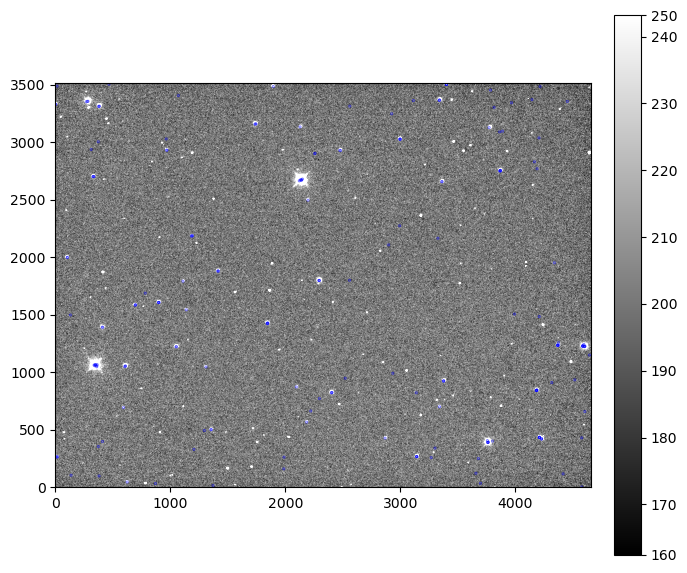

In [8]:
from convenience_functions import show_image, find_magnitude

show_image(test, cmap = 'gray')
apertures.plot(color='blue', lw=1.5, alpha=0.5);

In [9]:
from photutils.aperture import aperture_photometry

aperture_photometry(test, apertures)

id,xcenter,ycenter,aperture_sum
,pix,pix,
int32,float64,float64,float64
1,4577.713042780137,3.734010598307984,9735.54502876928
2,1371.7998742547577,16.537220952787532,9340.393853727965
3,871.1894925450907,33.775000100494765,10400.699507147996
4,3696.990255296834,35.72638128717499,10778.227641684234
5,625.8322623726966,46.8638347296734,34546.327329687614
6,381.09180700691957,99.31304328772414,10220.986697824563
7,137.92602487442863,105.93184986254843,9903.14931507885
8,4415.62217369711,117.90858881130173,9438.812380812798


In [10]:
def aperture_photometry_function(array):
    mean, median, std = sigma_clipped_stats(array, sigma=2.5)
    daofind = DAOStarFinder(fwhm=3.0, threshold=10000)
    sources = daofind(array - median)
    positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
    apertures = CircularAperture(positions, r=4.)
    result = aperture_photometry(test, apertures)
    return result

In [11]:
test_dict = dict()
for index, array in enumerate(data):
    test_dict[index] = aperture_photometry_function(array)

In [12]:
test_dict

{0: <QTable length=9>
   id       xcenter            ycenter          aperture_sum   
              pix                pix                           
 int32      float64            float64            float64      
 ----- ------------------ ------------------ ------------------
     1 3760.8919796819146  390.4892201707358  2057006.156287268
     2  344.8899851625223 1057.3430320446053  2405774.509993118
     3 337.67026277241615 1062.8653915107793  2128434.818734395
     4 352.28980723659026 1065.2973020793333 2189704.8168405187
     5  349.7348139504464 1065.6087676528782 2994037.1151121296
     6  343.8664908272689 1066.4147619917087 3070602.3376130676
     7  2141.277277776186 2670.3780392343333 2911606.5517511014
     8 2130.4487169038102 2672.7110298363855  2760228.640686096
     9  2142.406672197283 2674.9498450687997  2808771.074720327,
 1: <QTable length=8>
   id       xcenter            ycenter          aperture_sum   
              pix                pix                       

In [13]:
for i in test_dict.keys():
    test_dict[i] = test_dict[i].to_pandas()

In [14]:
caca = test_dict[0].sort_values('aperture_sum', ascending = False)[:10]
caca_0 = test_dict[1].sort_values('aperture_sum', ascending = False)[:10]

In [15]:
from astroquery.astrometry_net import AstrometryNet

ast = AstrometryNet

In [16]:
from astropy.table import Table
from astroquery.astrometry_net import AstrometryNet

ast = AstrometryNet()
ast.api_key = 'vjzfuceldhqgdzxe'

wcs_header = ast.solve_from_image('../reduced-lights_2022_03_20/RV_Uma_Light_Luminance_16_secs_001.fits')

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Determining background stats
Finding sources
Found 160 sources
 id     xcentroid      ...        flux                 mag          
--- ------------------ ... ------------------ ----------------------
 58 343.86649082726893 ... 51.705582591532725      -4.28384358973718
110  2141.277277776186 ...  49.01277746667226     -4.225773284758982
 57  349.7348139504464 ...  46.37831836908986     -4.165787493772111
111 2130.4487169038102 ...  46.07248249510115     -4.158604034260799
 55 337.67025914209876 ...  45.39411098562351     -4.142498787851022
 56  352.2898103076663 ... 43.263372869842506     -4.090300936489749
113  2142.406672197283 ...  41.28458254324258      -4.03946974376117
 54  344.8899851625223 ...  37.82687032285454     -3.944501026524161
 16 3760.8919796819146 ...  32.55037932402783    -3.7813901349004846
 17 3761.5739336534366 ... 27.041384234577727    -3.58007229

In [17]:
print('RA', wcs_header['CRVAL1'])
print('DEC', wcs_header['CRVAL2'])

RA 203.072596791
DEC 54.1004298289


In [18]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
1,4577.713,3.7340106,0.91974464,0.3960576,0.03631412,25,0,369.09549,1.0029318,-0.0031784511
2,1371.7999,16.537221,0.43383126,-0.25303924,-0.37604167,25,0,119.56776,1.0073967,-0.0080013012
3,871.18949,33.775,0.99153015,-0.53452233,-0.47316666,25,0,417.90877,1.0807058,-0.084268741
4,3696.9903,35.726381,0.75582016,0.60957992,0.63517761,25,0,377.52428,1.291317,-0.27758218
5,625.83226,46.863835,0.65189081,-0.31936145,-0.66614865,25,0,814.58592,1.0802611,-0.083821812
6,381.09181,99.313043,0.45010845,-0.15819388,0.092980616,25,0,187.49566,1.0615475,-0.064848619
7,137.92602,105.93185,0.95655055,-0.40803665,-0.074698718,25,0,428.88521,1.1716113,-0.17195891
8,4415.6222,117.90859,0.96863125,-0.10477125,0.2787251,25,0,426.94117,1.2189571,-0.21497109
9,3657.8263,123.03519,0.9769176,0.13148229,-0.2991396,25,0,414.34774,1.1050871,-0.10849126


In [19]:
sources['xcentroid']
sources['ycentroid']

3.7340106
16.537221
33.775
35.726381
46.863835
99.313043
105.93185
117.90859
123.03519
161.03255
250.51785


TODO

DO APERTURE PHOTOMETRY ON THE STARS OF THE FIRST IMAGE

PASS EVERYTHING TO SKY COORDINATES

RUN APERTURE PHOTOMETRY ON EVERY OTHER IMAGE USING SKY COORDINATES